# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [67]:
temp =pd.read_csv(r"Temp_States.csv")


#### Print `temp`

In [5]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [7]:
temp.info()

we have got floats and a couple of objects


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [27]:
temp.iloc[:3]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [28]:
temp.iloc[:3].mean()

C:\Users\jelsa\AppData\Local\Temp\ipykernel_2068\2588181365.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp.iloc[:3].mean()


Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [39]:
temp[['State', 'City']][temp['Temperature']>15]


,State,City
0,New York,NYC
3,Connecticut,Hartford
5,New Jersey,Treton
6,New Jersey,Newark


In [43]:
temp[temp['Temperature']>15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [47]:
temp['City'][temp['Temperature']>15]


0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [54]:
(temp['Temperature']>15) & (temp['Temperature']<20)

0     True
1    False
2    False
3     True
4    False
5    False
6    False
Name: Temperature, dtype: bool

In [56]:
temp['City'][ (temp['Temperature']>15) & (temp['Temperature']<20) ]

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [69]:
temperature = temp.groupby("State").agg({'Temperature':['mean', 'std']})
temperature

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [72]:
employee=pd.read_csv(r"employee.csv")

import matplotlib.pyplot as plt

#### Explore the data types of the Temp dataframe. Comment your results

In [73]:
employee.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


In [88]:
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

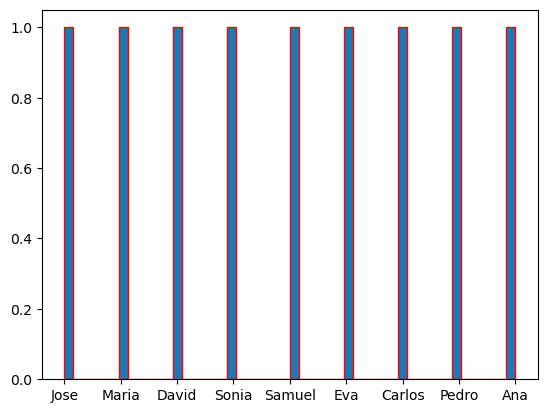

In [84]:
plt.hist(employee["Name"], bins=50, edgecolor="red")
plt.show()

#### What's the average salary in this company?

In [86]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [89]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [90]:
employee['Salary'].min()


30

#### Who are the employees with the lowest salary?

In [108]:
employee = employee.sort_values(by="Salary") # ordenamos los salarios
lowest_salary_employees = employee.head(2) # Metemos una variable de empleados con menos salarios y luego lo printeamos
print(lowest_salary_employees)

    Name Department Education Gender    Title  Years  Salary
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Could you give all the information about an employee called David?

In [105]:
employee.iloc[1]


Name            David
Department         HR
Education      Master
Gender              M
Title         analyst
Years               2
Salary             30
Name: 2, dtype: object

#### Could you give only David's salary?

In [109]:
employee.iloc[1]['Salary']


30

In [110]:
employee.Salary[employee.Name=='David'] # Lo he puesto para aprender

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [111]:
employee


,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
0,Jose,IT,Bachelor,M,analyst,1,35
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60
6,Carlos,IT,Master,M,VP,8,70
8,Ana,HR,Master,F,VP,8,70


In [115]:
associate1 = employee[employee["Title"] == "associate"]
associate1

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [116]:
employee.iloc[:3]


,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
0,Jose,IT,Bachelor,M,analyst,1,35


In [117]:
employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
0,Jose,IT,Bachelor,M,analyst,1,35


#### Find the employees who's title is associate and the salary above 55?

In [118]:
employee['Name'][ (employee['Title']=='associate') & (employee['Salary']>55) ]


7    Pedro
Name: Name, dtype: object

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [119]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
0,Jose,IT,Bachelor,M,analyst,1,35
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60
6,Carlos,IT,Master,M,VP,8,70
8,Ana,HR,Master,F,VP,8,70


In [153]:
employee.groupby('Years').mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [156]:
average_sal=employee.groupby('Title')['Salary'].mean()
average_sal

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [157]:
%pip install matplotlib
%pip install pylab/ipython

%pip install seaborn

import pylab as plt

import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'pylab/ipython'


Note: you may need to restart the kernel to use updated packages.


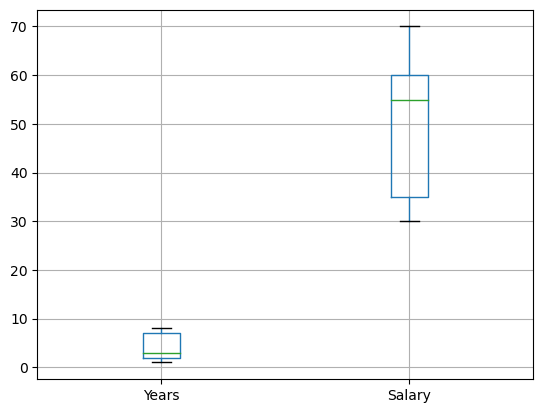

In [158]:
employee.boxplot();

In [159]:
employee.describe().T

,count,mean,std,min,25%,50%,75%,max
Years,9.0,4.111111,2.803767,1.0,2.0,3.0,7.0,8.0
Salary,9.0,48.888889,16.541194,30.0,35.0,55.0,60.0,70.0


In [162]:
import numpy as np

In [177]:
first_quartile = employee['Salary'].quantile(0.25)
print(first_quartile)

35.0


In [176]:
third_quartile = employee['Salary'].quantile(0.75)
print(third_quartile)

60.0


#### Is the mean salary per gender different?

In [180]:
salary_per_gend = employee.groupby('Gender')['Salary'].mean()
salary_per_gend



Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [182]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
0,Jose,IT,Bachelor,M,analyst,1,35
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60
6,Carlos,IT,Master,M,VP,8,70
8,Ana,HR,Master,F,VP,8,70


In [184]:
employee['Years'].mean()

4.111111111111111

In [185]:
employee['Years'].min()

1

In [186]:
employee['Years'].max()

8

In [187]:
employee['Salary'].mean()

48.888888888888886

In [188]:
employee['Salary'].min()

30

In [189]:
employee['Salary'].max()

70

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [200]:
orders =pd.read_csv(r"Orders.csv")


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [201]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [203]:
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
dataframe with different kind of Dtypes.

####  What is the average Purchase Price?

In [204]:
orders['UnitPrice'].mean()

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [205]:
orders['UnitPrice'].min()

0.0

In [206]:
orders['UnitPrice'].max()

8142.75

#### Select all the customers we have in Spain

In [208]:
orders.CustomerID[orders.Country=='Spain']

4250      12557
4251      12557
4252      12557
4253      12557
4254      12557
          ...  
394733    17097
394734    17097
394735    17097
394736    17097
394737    17097
Name: CustomerID, Length: 2485, dtype: int64

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [217]:
orders['Country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

#### Select all the customers who have bought more than 50 items ?

In [219]:
orders['CustomerID'][orders['Quantity']>50]

46        13748
83        15291
96        14688
102       14688
174       16029
          ...  
397720    18102
397721    16626
397729    16626
397761    15311
397882    13777
Name: CustomerID, Length: 11609, dtype: int64

#### Select orders from Spain that are above 50 items

In [222]:
spain_orders = orders[(orders["Country"] == "Spain") & (orders["Quantity"] > 50)]
spain_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [ ]:
orders

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [229]:
lunch_bag_orders = orders[(orders['Description'] == 'lunch bag')]

lunch_bag_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent


In [230]:
lunch_bag_orders = orders[(orders['year']) & (orders['Description'] == 'lunch bag')]

lunch_bag_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [239]:
lunch_bag_orders = orders.loc[(orders['year'] == 2011) & (orders['Description'] == 'lunch bag')]
lunch_bag_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent


#### Show the frequency distribution of the amount spent in Spain.

In [236]:
plt.hist(employee["Country"=='Spain'], bins=10, edgecolor="red")


KeyError: False

#### Select all orders made in the month of August

In [243]:
august_orders = orders[(orders['month'] == 8)]
august_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [245]:
order_co = august_orders['Country'].value_counts()
order_co

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [248]:
amount_spe_per_count = orders.groupby('Country')['amount_spent'].mean()
amount_spe_per_count

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [250]:
item_most = orders.groupby('Description')['UnitPrice'].max()
item_most

Description
 4 purple flock dinner candles       2.55
 50's christmas gift bag large       1.25
 dolly girl beaker                   1.25
 i love london mini backpack         4.15
 i love london mini rucksack         4.15
                                    ...  
zinc t-light holder stars small      1.63
zinc top  2 door wooden shelf       16.95
zinc willie winkie  candle stick     1.63
zinc wire kitchen organiser         10.40
zinc wire sweetheart letter tray     3.75
Name: UnitPrice, Length: 3877, dtype: float64

#### What was the average amount spent per year ?

In [252]:
aver_amount= orders.groupby('year')['amount_spent'].mean()
aver_amount

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64